In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [7]:
companywisecount = df.groupby(["company"])["company"].count()

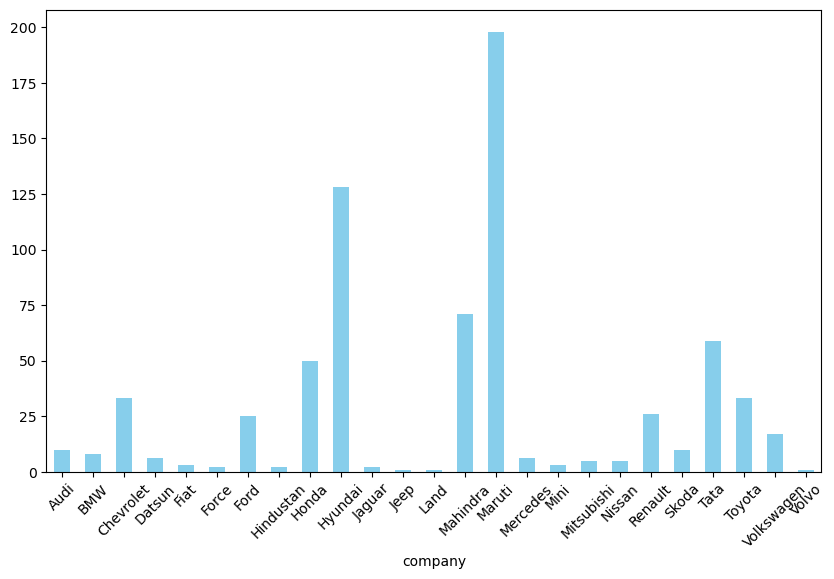

In [18]:
plt.figure(figsize=(10, 6))
companywisecount.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.show()
# plt.savefig('company_vehicle_count.png', format='png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [20]:
fueltypecount = df.groupby(['fuel_type'])['fuel_type'].count()

fuel_type
Diesel    322
LPG         2
Petrol    381
Name: fuel_type, dtype: int64

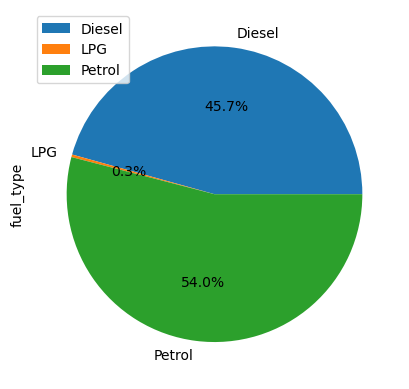

In [24]:
fueltypecount = df.groupby(['fuel_type'])['fuel_type'].count()
fueltypecount.plot(kind='pie', autopct='%1.1f%%', legend=True)
plt.show()

In [25]:
#OneHotEncoding
#LabelEncoding

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
2,4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
3,6,Ford Figo,Ford,2012,175000,41000,Diesel
4,7,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
...,...,...,...,...,...,...,...
700,883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
701,885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
702,886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
703,888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [27]:
#Dividing dataset into independant and dependant variables
X = df[["company", "name", "year", "kms_driven", "fuel_type"]]
y = df[["Price"]]

In [31]:
#Lets create columntransformer for OHE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder()
ohe.fit(X[["company", "name", "fuel_type"]])

OneHotEncoder()

In [33]:
#Lets create column tranformer to provide numeric values for every string column
ct = make_column_transformer(
 (OneHotEncoder(categories = ohe.categories_), 
["company", "name", "fuel_type"]),
remainder='passthrough')

In [36]:
#fit - Go and find info_formula
#tranform - go and apply formula
#fit_transform - go, find formula and apply

In [37]:
#Lets create object of LinearRegression class(model)
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [38]:
#Lets make pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct, reg)

In [39]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Vol...
       'Volkswagen Polo Highline1.2L P',
       'Volkswagen Polo Trendline 1.5L D',
       'Volkswagen Vento Comfortline Diesel',
       'Volkswagen Vento Comfortline Petrol',
       'Volkswagen Vento Highline Plus 1.5 Diesel AT',
       'Volkswagen Vento Konekt Diesel Highline', 'Volvo S80 Summum D4'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['company', 'name',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [64]:
#Lets divide dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

scores = []

for i in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = i)
    #Lets train pipe
    pipe.fit(X_train, y_train)
    result = pipe.predict(X_test)
    score = r2_score(y_test, result)
    scores.append(score)

In [69]:
best = np.argmax(scores)
best

48

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = best)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Vol...
       'Volkswagen Polo Highline1.2L P',
       'Volkswagen Polo Trendline 1.5L D',
       'Volkswagen Vento Comfortline Diesel',
       'Volkswagen Vento Comfortline Petrol',
       'Volkswagen Vento Highline Plus 1.5 Diesel AT',
       'Volkswagen Vento Konekt Diesel Highline', 'Volvo S80 Summum D4'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['company', 'name',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [81]:
mydata = [["Hyundai", "Hyundai Grand i10 Magna 1.2 Kappa VTVT", 2020, 50000, "Petrol"]]
myinput = pd.DataFrame(columns = ['company', 'name', 'year', 'kms_driven', 'fuel_type'], data = mydata)
myinput

,company,name,year,kms_driven,fuel_type
0,Hyundai,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2020,50000,Petrol


In [83]:
result = pipe.predict(myinput)
result[0,0]

608022.8752425015